In [1]:
import pandas as pd
import numpy as np

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
import itertools
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('monthly-car-sales.csv')
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


<AxesSubplot:>

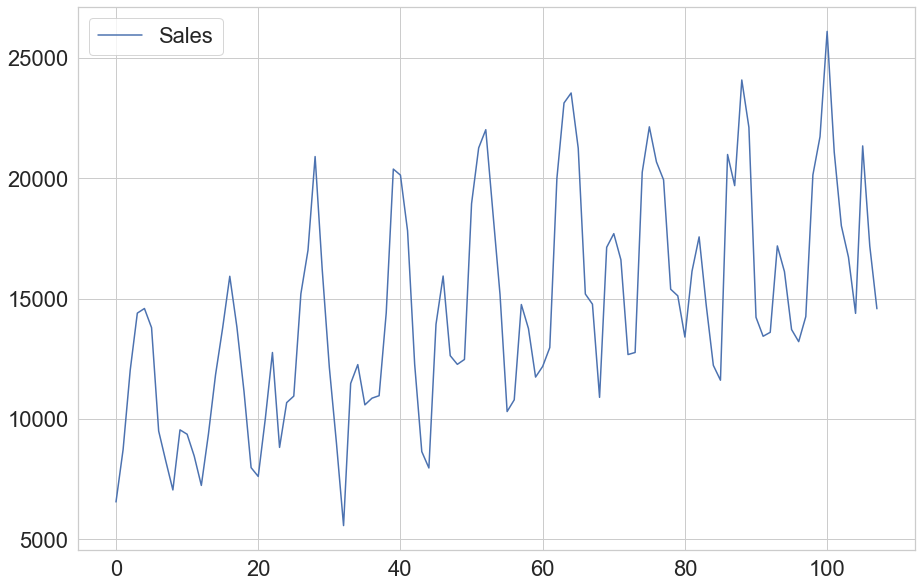

In [3]:
df.plot()

In [4]:
df['ds'] = pd.to_datetime(df['Month'])
df['y'] = df['Sales']
df.set_index(['Month'], inplace=True)

In [5]:
df

,Sales,ds,y
Month,,,
1960-01,6550,1960-01-01,6550
1960-02,8728,1960-02-01,8728
1960-03,12026,1960-03-01,12026
1960-04,14395,1960-04-01,14395
1960-05,14587,1960-05-01,14587
...,...,...,...
1968-08,16722,1968-08-01,16722
1968-09,14385,1968-09-01,14385
1968-10,21342,1968-10-01,21342


In [6]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_

Initial log joint probability = -4.39613
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       270.134   0.000422279       58.8045      0.2773           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       270.263   4.04776e-05       79.4959   4.827e-07       0.001      274  LS failed, Hessian reset 
     199       270.283    0.00017332       90.2784           1           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       270.299   3.51159e-07       75.5595   4.524e-09       0.001      440  LS failed, Hessian reset 
     294       270.299   6.74517e-09       87.4933      0.4168           1      469   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [7]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,9605.474420,4599.130343,7673.532194,9605.474420,9605.474420,-3465.153499,-3465.153499,-3465.153499,-3465.153499,-3465.153499,-3465.153499,0.0,0.0,0.0,6140.320921
1,1960-02-01,9709.125689,5236.682870,8297.462632,9709.125689,9709.125689,-2955.538351,-2955.538351,-2955.538351,-2955.538351,-2955.538351,-2955.538351,0.0,0.0,0.0,6753.587338
2,1960-03-01,9806.089779,11192.812255,14215.474980,9806.089779,9806.089779,2955.781853,2955.781853,2955.781853,2955.781853,2955.781853,2955.781853,0.0,0.0,0.0,12761.871631
3,1960-04-01,9909.741047,13343.434091,16442.588480,9909.741047,9909.741047,4916.601914,4916.601914,4916.601914,4916.601914,4916.601914,4916.601914,0.0,0.0,0.0,14826.342961
4,1960-05-01,10010.048727,14559.595201,17743.871320,10010.048727,10010.048727,6152.408446,6152.408446,6152.408446,6152.408446,6152.408446,6152.408446,0.0,0.0,0.0,16162.457173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1969-07-31,18876.207214,13372.925291,16567.551267,18859.101627,18892.183763,-3946.713947,-3946.713947,-3946.713947,-3946.713947,-3946.713947,-3946.713947,0.0,0.0,0.0,14929.493268
116,1969-08-31,18932.485219,12198.409065,15364.949845,18911.492839,18952.579882,-5147.425810,-5147.425810,-5147.425810,-5147.425810,-5147.425810,-5147.425810,0.0,0.0,0.0,13785.059409
117,1969-09-30,18986.947805,16669.812022,19845.235286,18962.205400,19010.479587,-628.791644,-628.791644,-628.791644,-628.791644,-628.791644,-628.791644,0.0,0.0,0.0,18358.156160
118,1969-10-31,19043.225809,19181.121348,22326.283162,19013.729566,19070.391333,1684.078615,1684.078615,1684.078615,1684.078615,1684.078615,1684.078615,0.0,0.0,0.0,20727.304425


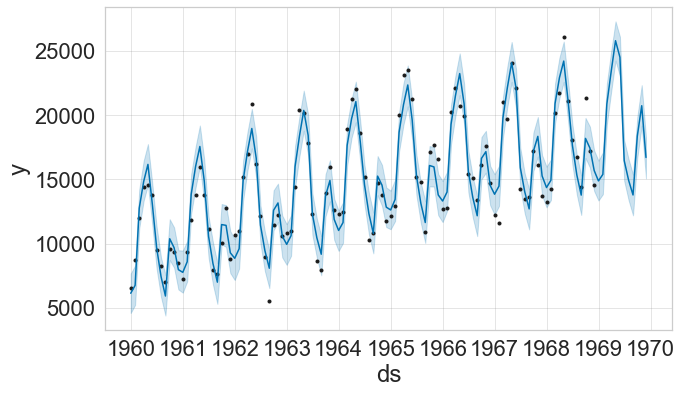

In [8]:
fig = model.plot(forecast)

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


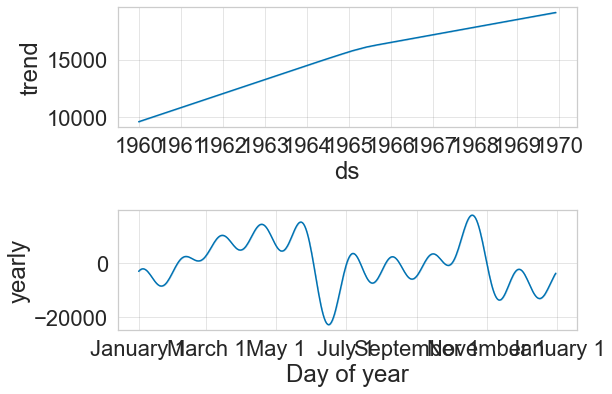

In [9]:
fig = model.plot_components(forecast)

In [10]:
df_cv = cross_validation(model, horizon='365 days')

INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-03 12:00:00 and 1967-12-02 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -53.4761
Iteration  1. Log joint probability =    35.4052. Improved by 88.8813.
Iteration  2. Log joint probability =    61.7702. Improved by 26.365.
Iteration  3. Log joint probability =    87.4061. Improved by 25.6359.
Iteration  4. Log joint probability =    107.938. Improved by 20.5317.
Iteration  5. Log joint probability =    109.037. Improved by 1.0992.
Iteration  6. Log joint probability =    112.514. Improved by 3.47718.
Iteration  7. Log joint probability =    112.521. Improved by 0.00718449.
Iteration  8. Log joint probability =    112.531. Improved by 0.0101886.
Iteration  9. Log joint probability =    112.649. Improved by 0.117143.
Iteration 10. Log joint probability =    112.652. Improved by 0.00354053.
Iteration 11. Log joint probability =    112.852. Improved by 0.199452.
Iteration 12. Log joint probability =     112.91. Improved by 0.0585784.
Iteration 13. Log joint probability =    113.011. Improved by 0.101199.
Iteration 14. Log joint 

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -59.224
Iteration  1. Log joint probability =    6.20692. Improved by 65.4309.
Iteration  2. Log joint probability =    62.4055. Improved by 56.1986.
Iteration  3. Log joint probability =    90.1617. Improved by 27.7562.
Iteration  4. Log joint probability =    119.639. Improved by 29.4778.
Iteration  5. Log joint probability =    130.123. Improved by 10.4832.
Iteration  6. Log joint probability =     130.56. Improved by 0.437116.
Iteration  7. Log joint probability =    130.631. Improved by 0.0711456.
Iteration  8. Log joint probability =    130.699. Improved by 0.0679502.
Iteration  9. Log joint probability =    130.705. Improved by 0.00602408.
Iteration 10. Log joint probability =    130.706. Improved by 0.0012169.
Iteration 11. Log joint probability =    130.714. Improved by 0.00810772.
Iteration 12. Log joint probability =    130.746. Improved by 0.0322397.
Iteration 13. Log joint probability =    130.755. Improved by 0.00836918.
Iteration 14. Log 

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version


Initial log joint probability = -64.6357
Iteration  1. Log joint probability =    21.2307. Improved by 85.8665.
Iteration  2. Log joint probability =    49.5337. Improved by 28.303.
Iteration  3. Log joint probability =    49.5579. Improved by 0.0242136.
Iteration  4. Log joint probability =    49.5779. Improved by 0.0200048.
Iteration  5. Log joint probability =     49.631. Improved by 0.0530304.
Iteration  6. Log joint probability =    49.6741. Improved by 0.0431144.
Iteration  7. Log joint probability =    49.9904. Improved by 0.316282.
Iteration  8. Log joint probability =    50.4347. Improved by 0.444329.
Iteration  9. Log joint probability =    51.4015. Improved by 0.966785.
Iteration 10. Log joint probability =    53.4273. Improved by 2.02582.
Iteration 11. Log joint probability =    57.0428. Improved by 3.61545.
Iteration 12. Log joint probability =    57.0499. Improved by 0.00714883.
Iteration 13. Log joint probability =    57.0744. Improved by 0.024449.
Iteration 14. Log joi

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -70.7963
Iteration  1. Log joint probability =    45.5519. Improved by 116.348.
Iteration  2. Log joint probability =    87.2126. Improved by 41.6607.
Iteration  3. Log joint probability =    123.307. Improved by 36.0941.
Iteration  4. Log joint probability =    152.872. Improved by 29.5653.
Iteration  5. Log joint probability =     161.31. Improved by 8.43756.
Iteration  6. Log joint probability =    161.642. Improved by 0.332794.
Iteration  7. Log joint probability =    161.713. Improved by 0.0700854.
Iteration  8. Log joint probability =    161.755. Improved by 0.0422742.
Iteration  9. Log joint probability =    161.771. Improved by 0.0163399.
Iteration 10. Log joint probability =    161.809. Improved by 0.0377003.
Iteration 11. Log joint probability =    161.827. Improved by 0.0177239.
Iteration 12. Log joint probability =     161.83. Improved by 0.00298429.
Iteration 13. Log joint probability =    161.843. Improved by 0.0134132.
Iteration 14. Log j

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -75.9272
Iteration  1. Log joint probability =    57.0629. Improved by 132.99.
Iteration  2. Log joint probability =    96.4784. Improved by 39.4155.
Iteration  3. Log joint probability =    138.007. Improved by 41.5282.
Iteration  4. Log joint probability =    165.521. Improved by 27.5142.
Iteration  5. Log joint probability =    176.293. Improved by 10.7725.
Iteration  6. Log joint probability =    177.495. Improved by 1.20145.
Iteration  7. Log joint probability =    177.503. Improved by 0.00852367.
Iteration  8. Log joint probability =    177.709. Improved by 0.205496.
Iteration  9. Log joint probability =    177.916. Improved by 0.207528.
Iteration 10. Log joint probability =    178.212. Improved by 0.295365.
Iteration 11. Log joint probability =    178.296. Improved by 0.0848583.
Iteration 12. Log joint probability =    178.414. Improved by 0.117391.
Iteration 13. Log joint probability =    178.456. Improved by 0.0421565.
Iteration 14. Log joint p

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -81.423
Iteration  1. Log joint probability =    63.2515. Improved by 144.675.
Iteration  2. Log joint probability =    97.3299. Improved by 34.0784.
Iteration  3. Log joint probability =    121.233. Improved by 23.9032.
Iteration  4. Log joint probability =     134.35. Improved by 13.1171.
Iteration  5. Log joint probability =    136.529. Improved by 2.17857.
Iteration  6. Log joint probability =    163.892. Improved by 27.3632.
Iteration  7. Log joint probability =    163.895. Improved by 0.00282363.
Iteration  8. Log joint probability =     163.98. Improved by 0.0854774.
Iteration  9. Log joint probability =    164.035. Improved by 0.0546896.
Iteration 10. Log joint probability =    164.062. Improved by 0.0271962.
Iteration 11. Log joint probability =    164.355. Improved by 0.292523.
Iteration 12. Log joint probability =    165.241. Improved by 0.886127.
Iteration 13. Log joint probability =    165.404. Improved by 0.163537.
Iteration 14. Log joint 

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version


Initial log joint probability = -86.9425
Iteration  1. Log joint probability =    69.6855. Improved by 156.628.
Iteration  2. Log joint probability =    103.106. Improved by 33.4208.
Iteration  3. Log joint probability =    146.218. Improved by 43.1115.
Iteration  4. Log joint probability =    146.259. Improved by 0.0409958.
Iteration  5. Log joint probability =    146.276. Improved by 0.0172952.
Iteration  6. Log joint probability =    146.323. Improved by 0.0466689.
Iteration  7. Log joint probability =    146.398. Improved by 0.075038.
Iteration  8. Log joint probability =    146.713. Improved by 0.314881.
Iteration  9. Log joint probability =    172.027. Improved by 25.3141.
Iteration 10. Log joint probability =     195.41. Improved by 23.3835.
Iteration 11. Log joint probability =    196.658. Improved by 1.24803.
Iteration 12. Log joint probability =    196.723. Improved by 0.0645727.
Iteration 13. Log joint probability =    197.942. Improved by 1.21948.
Iteration 14. Log joint p

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -93.0967
Iteration  1. Log joint probability =    61.7391. Improved by 154.836.
Iteration  2. Log joint probability =    126.586. Improved by 64.8466.
Iteration  3. Log joint probability =    162.403. Improved by 35.8174.
Iteration  4. Log joint probability =    177.733. Improved by 15.3298.
Iteration  5. Log joint probability =    190.744. Improved by 13.0115.
Iteration  6. Log joint probability =    211.926. Improved by 21.1817.
Iteration  7. Log joint probability =    211.935. Improved by 0.00944552.
Iteration  8. Log joint probability =    211.964. Improved by 0.0284789.
Iteration  9. Log joint probability =    211.997. Improved by 0.0333003.
Iteration 10. Log joint probability =    212.014. Improved by 0.0171391.
Iteration 11. Log joint probability =    212.207. Improved by 0.192963.
Iteration 12. Log joint probability =    212.298. Improved by 0.0902597.
Iteration 13. Log joint probability =    212.306. Improved by 0.00860515.
Iteration 14. Log jo

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -98.2362
Iteration  1. Log joint probability =     69.693. Improved by 167.929.
Iteration  2. Log joint probability =    140.161. Improved by 70.4681.
Iteration  3. Log joint probability =    188.161. Improved by 48.0002.
Iteration  4. Log joint probability =     205.34. Improved by 17.1789.
Iteration  5. Log joint probability =    218.373. Improved by 13.0331.
Iteration  6. Log joint probability =     218.39. Improved by 0.0167238.
Iteration  7. Log joint probability =    218.404. Improved by 0.0144504.
Iteration  8. Log joint probability =    218.423. Improved by 0.0189354.
Iteration  9. Log joint probability =    218.594. Improved by 0.170995.
Iteration 10. Log joint probability =    218.604. Improved by 0.00914136.
Iteration 11. Log joint probability =    218.672. Improved by 0.0682126.
Iteration 12. Log joint probability =    218.674. Improved by 0.00266583.
Iteration 13. Log joint probability =    218.675. Improved by 0.000113742.
Iteration 14. Lo

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -104.85
Iteration  1. Log joint probability =    72.7915. Improved by 177.641.
Iteration  2. Log joint probability =     141.49. Improved by 68.6982.
Iteration  3. Log joint probability =    148.523. Improved by 7.03351.
Iteration  4. Log joint probability =    148.546. Improved by 0.0223531.
Iteration  5. Log joint probability =    148.554. Improved by 0.00880483.
Iteration  6. Log joint probability =    148.576. Improved by 0.0214036.
Iteration  7. Log joint probability =    148.585. Improved by 0.00973269.
Iteration  8. Log joint probability =    148.606. Improved by 0.0204538.
Iteration  9. Log joint probability =    148.617. Improved by 0.0106609.
Iteration 10. Log joint probability =    148.636. Improved by 0.0195037.
Iteration 11. Log joint probability =    148.648. Improved by 0.0115894.
Iteration 12. Log joint probability =    148.666. Improved by 0.0185532.
Iteration 13. Log joint probability =    148.679. Improved by 0.0125183.
Iteration 14. 

In [12]:
cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']

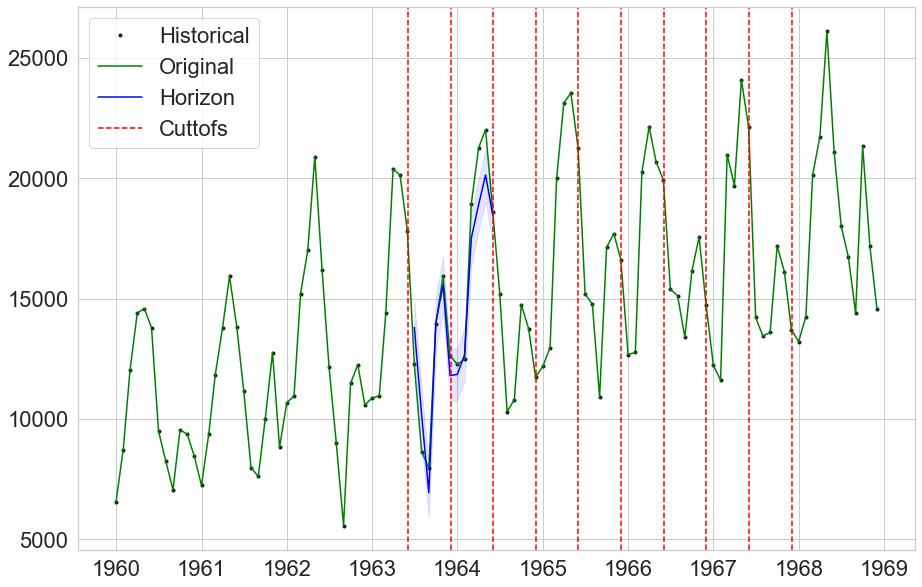

In [13]:
df_cv1 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[0]]

fig, ax = plt.subplots()

ax.plot(model.history['ds'], model.history['y'], 'k.', label = 'Historical')
ax.plot(df['ds'], df['y'], label = 'Original', color='green')
ax.plot(df_cv1['ds'], df_cv1['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv1['ds'],
               df_cv1['yhat_lower'],
               df_cv1['yhat_upper'],
               color = 'blue',
               alpha = 0.1)
for i in range(len(cutoffs)):
    plt_dict = {'x': cutoffs[i],
               'c': 'red',
                'ls':'--'
               }
    if i == 0:
        plt_dict['label'] = 'Cuttofs'
    ax.axvline(**plt_dict)
ax.legend()
plt.show()

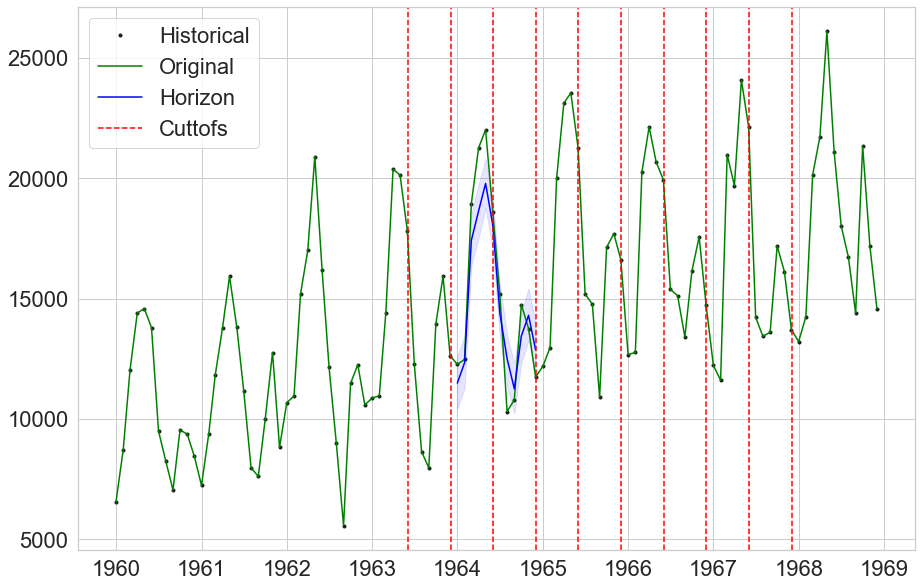

In [14]:
df_cv1 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[1]]

fig, ax = plt.subplots()

ax.plot(model.history['ds'], model.history['y'], 'k.', label = 'Historical')
ax.plot(df['ds'], df['y'], label = 'Original', color='green')
ax.plot(df_cv1['ds'], df_cv1['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv1['ds'],
               df_cv1['yhat_lower'],
               df_cv1['yhat_upper'],
               color = 'blue',
               alpha = 0.1)
for i in range(len(cutoffs)):
    plt_dict = {'x': cutoffs[i],
               'c': 'red',
                'ls':'--'
               }
    if i == 0:
        plt_dict['label'] = 'Cuttofs'
    ax.axvline(**plt_dict)
ax.legend()
plt.show()

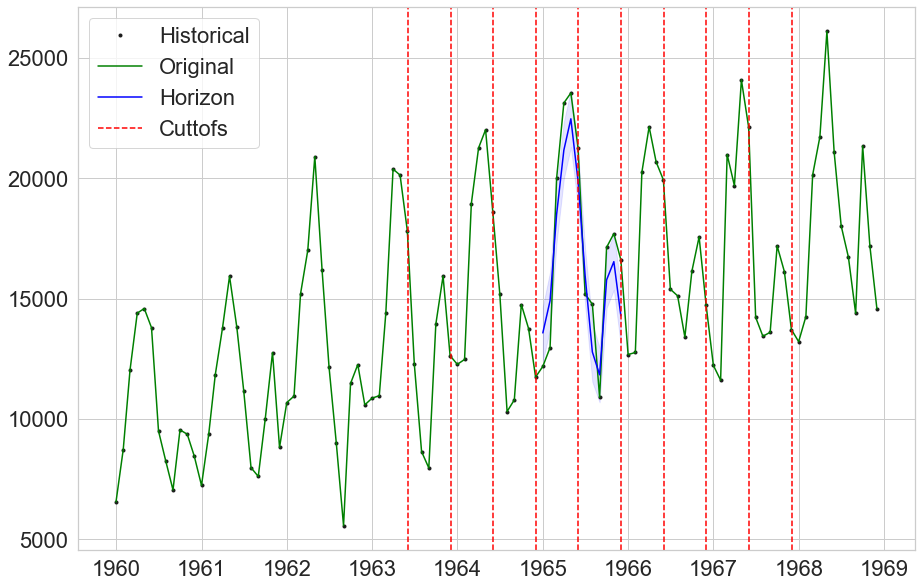

In [15]:
df_cv1 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[3]]

fig, ax = plt.subplots()

ax.plot(model.history['ds'], model.history['y'], 'k.', label = 'Historical')
ax.plot(df['ds'], df['y'], label = 'Original', color='green')
ax.plot(df_cv1['ds'], df_cv1['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv1['ds'],
               df_cv1['yhat_lower'],
               df_cv1['yhat_upper'],
               color = 'blue',
               alpha = 0.1)
for i in range(len(cutoffs)):
    plt_dict = {'x': cutoffs[i],
               'c': 'red',
                'ls':'--'
               }
    if i == 0:
        plt_dict['label'] = 'Cuttofs'
    ax.axvline(**plt_dict)
ax.legend()
plt.show()

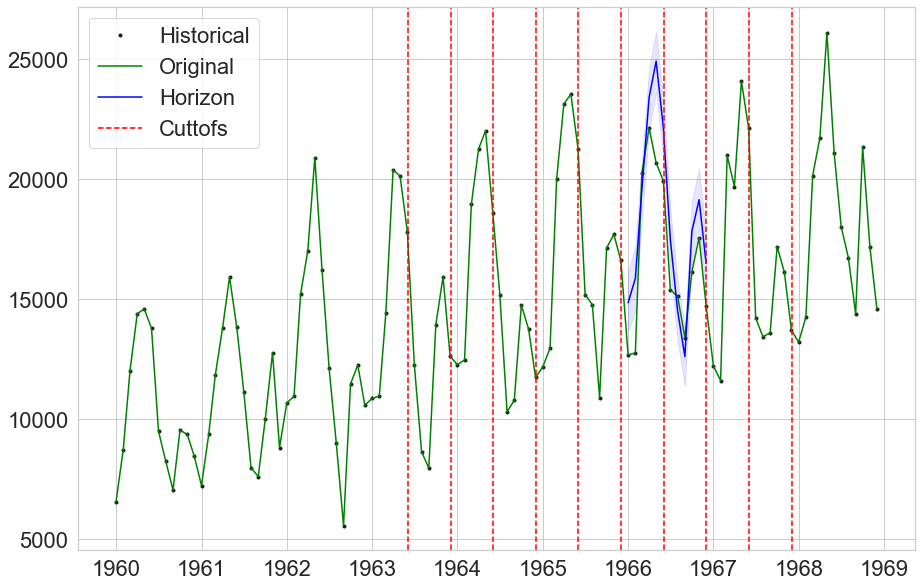

In [16]:
df_cv1 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[5]]

fig, ax = plt.subplots()

ax.plot(model.history['ds'], model.history['y'], 'k.', label = 'Historical')
ax.plot(df['ds'], df['y'], label = 'Original', color='green')
ax.plot(df_cv1['ds'], df_cv1['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv1['ds'],
               df_cv1['yhat_lower'],
               df_cv1['yhat_upper'],
               color = 'blue',
               alpha = 0.1)
for i in range(len(cutoffs)):
    plt_dict = {'x': cutoffs[i],
               'c': 'red',
                'ls':'--'
               }
    if i == 0:
        plt_dict['label'] = 'Cuttofs'
    ax.axvline(**plt_dict)
ax.legend()
plt.show()

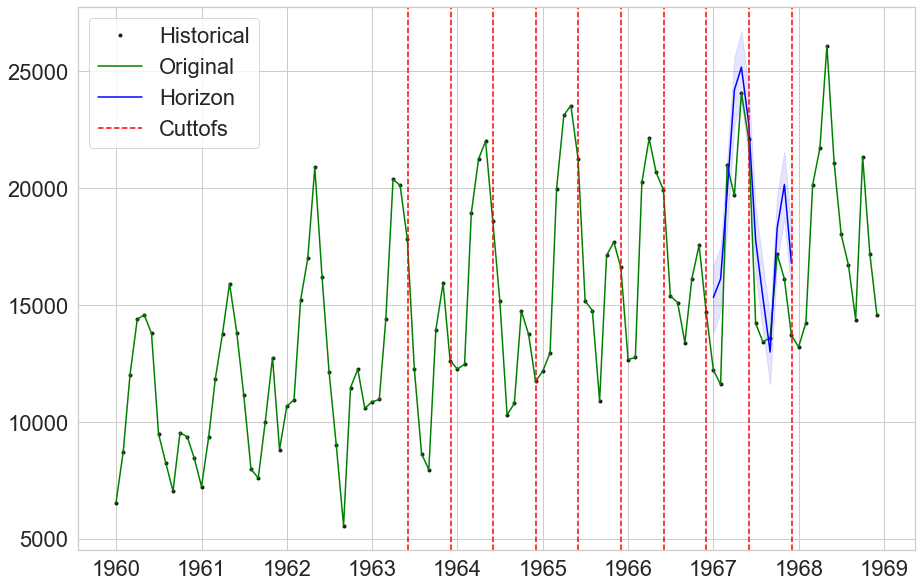

In [17]:
df_cv1 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[7]]

fig, ax = plt.subplots()

ax.plot(model.history['ds'], model.history['y'], 'k.', label = 'Historical')
ax.plot(df['ds'], df['y'], label = 'Original', color='green')
ax.plot(df_cv1['ds'], df_cv1['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv1['ds'],
               df_cv1['yhat_lower'],
               df_cv1['yhat_upper'],
               color = 'blue',
               alpha = 0.1)
for i in range(len(cutoffs)):
    plt_dict = {'x': cutoffs[i],
               'c': 'red',
                'ls':'--'
               }
    if i == 0:
        plt_dict['label'] = 'Cuttofs'
    ax.axvline(**plt_dict)
ax.legend()
plt.show()

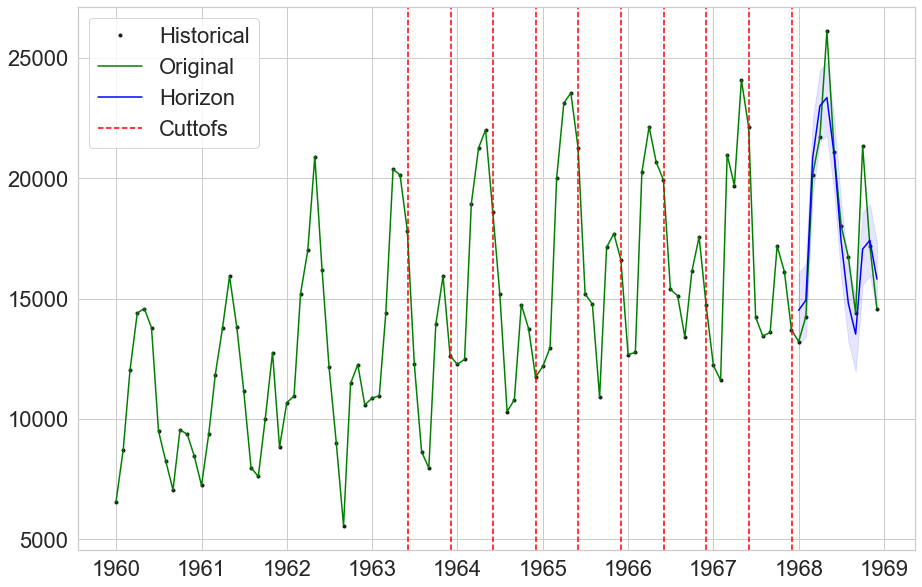

In [18]:
df_cv1 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[9]]

fig, ax = plt.subplots()

ax.plot(model.history['ds'], model.history['y'], 'k.', label = 'Historical')
ax.plot(df['ds'], df['y'], label = 'Original', color='green')
ax.plot(df_cv1['ds'], df_cv1['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv1['ds'],
               df_cv1['yhat_lower'],
               df_cv1['yhat_upper'],
               color = 'blue',
               alpha = 0.1)
for i in range(len(cutoffs)):
    plt_dict = {'x': cutoffs[i],
               'c': 'red',
                'ls':'--'
               }
    if i == 0:
        plt_dict['label'] = 'Cuttofs'
    ax.axvline(**plt_dict)
ax.legend()
plt.show()

In [19]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,59 days 12:00:00,3.153639e+06,1775.848839,1600.093577,0.130422,0.119738,0.122439,0.416667
1,60 days 00:00:00,2.961228e+06,1720.822009,1500.092601,0.123813,0.119738,0.116241,0.458333
2,61 days 00:00:00,4.818892e+06,2195.197447,1844.578149,0.153510,0.137597,0.139946,0.375000
3,89 days 00:00:00,4.145742e+06,2036.109634,1658.881701,0.121811,0.077652,0.112824,0.458333
4,89 days 12:00:00,3.980678e+06,1995.163699,1614.966284,0.122091,0.102938,0.114264,0.500000


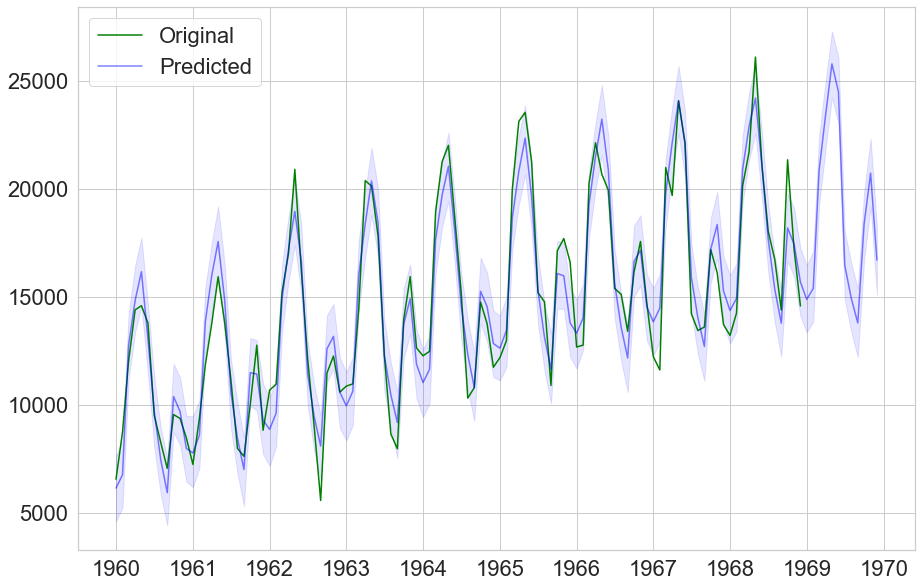

In [20]:
fig, ax = plt.subplots()
ax.plot(df['ds'], df['y'], label = 'Original', color='green')
ax.plot(forecast['ds'],forecast['yhat'], label = 'Predicted', color='blue', alpha=0.5)
ax.fill_between(forecast['ds'],forecast['yhat_lower'],forecast['yhat_upper'],
               color = 'blue',
               alpha=0.1)
ax.legend()
plt.show()

In [21]:
df_p = performance_metrics(df_cv)

In [22]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,59 days 12:00:00,3.153639e+06,1775.848839,1600.093577,0.130422,0.119738,0.122439,0.416667
1,60 days 00:00:00,2.961228e+06,1720.822009,1500.092601,0.123813,0.119738,0.116241,0.458333
2,61 days 00:00:00,4.818892e+06,2195.197447,1844.578149,0.153510,0.137597,0.139946,0.375000
3,89 days 00:00:00,4.145742e+06,2036.109634,1658.881701,0.121811,0.077652,0.112824,0.458333
4,89 days 12:00:00,3.980678e+06,1995.163699,1614.966284,0.122091,0.102938,0.114264,0.500000
5,90 days 00:00:00,3.769145e+06,1941.428481,1544.172426,0.114546,0.077652,0.107090,0.541667
6,90 days 12:00:00,2.729078e+06,1651.992085,1423.122651,0.104870,0.088374,0.102596,0.625000
7,119 days 12:00:00,2.016135e+06,1419.906555,1215.271624,0.087979,0.077652,0.087813,0.687500
8,120 days 00:00:00,3.629967e+06,1905.247150,1561.623843,0.096641,0.096729,0.096943,0.625000
9,120 days 12:00:00,3.478504e+06,1865.074699,1474.400783,0.085431,0.078393,0.084819,0.687500


In [43]:
df_p.mean()

horizon     215 days 09:46:02.790697676
mse                      3622226.570539
rmse                        1887.530406
mae                         1572.847058
mape                           0.099916
mdape                          0.085085
smape                          0.095926
coverage                       0.482074
dtype: object

In [25]:
model1 = Prophet()
model1.fit(df, seasonality_mode='multiplicative')
future = model1.make_future_dataframe(periods=12, freq='M', seasonality_mode='multiplicative')
forecast = model1.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


ValueError: Parameter `seasonality_mode` is not recognized.